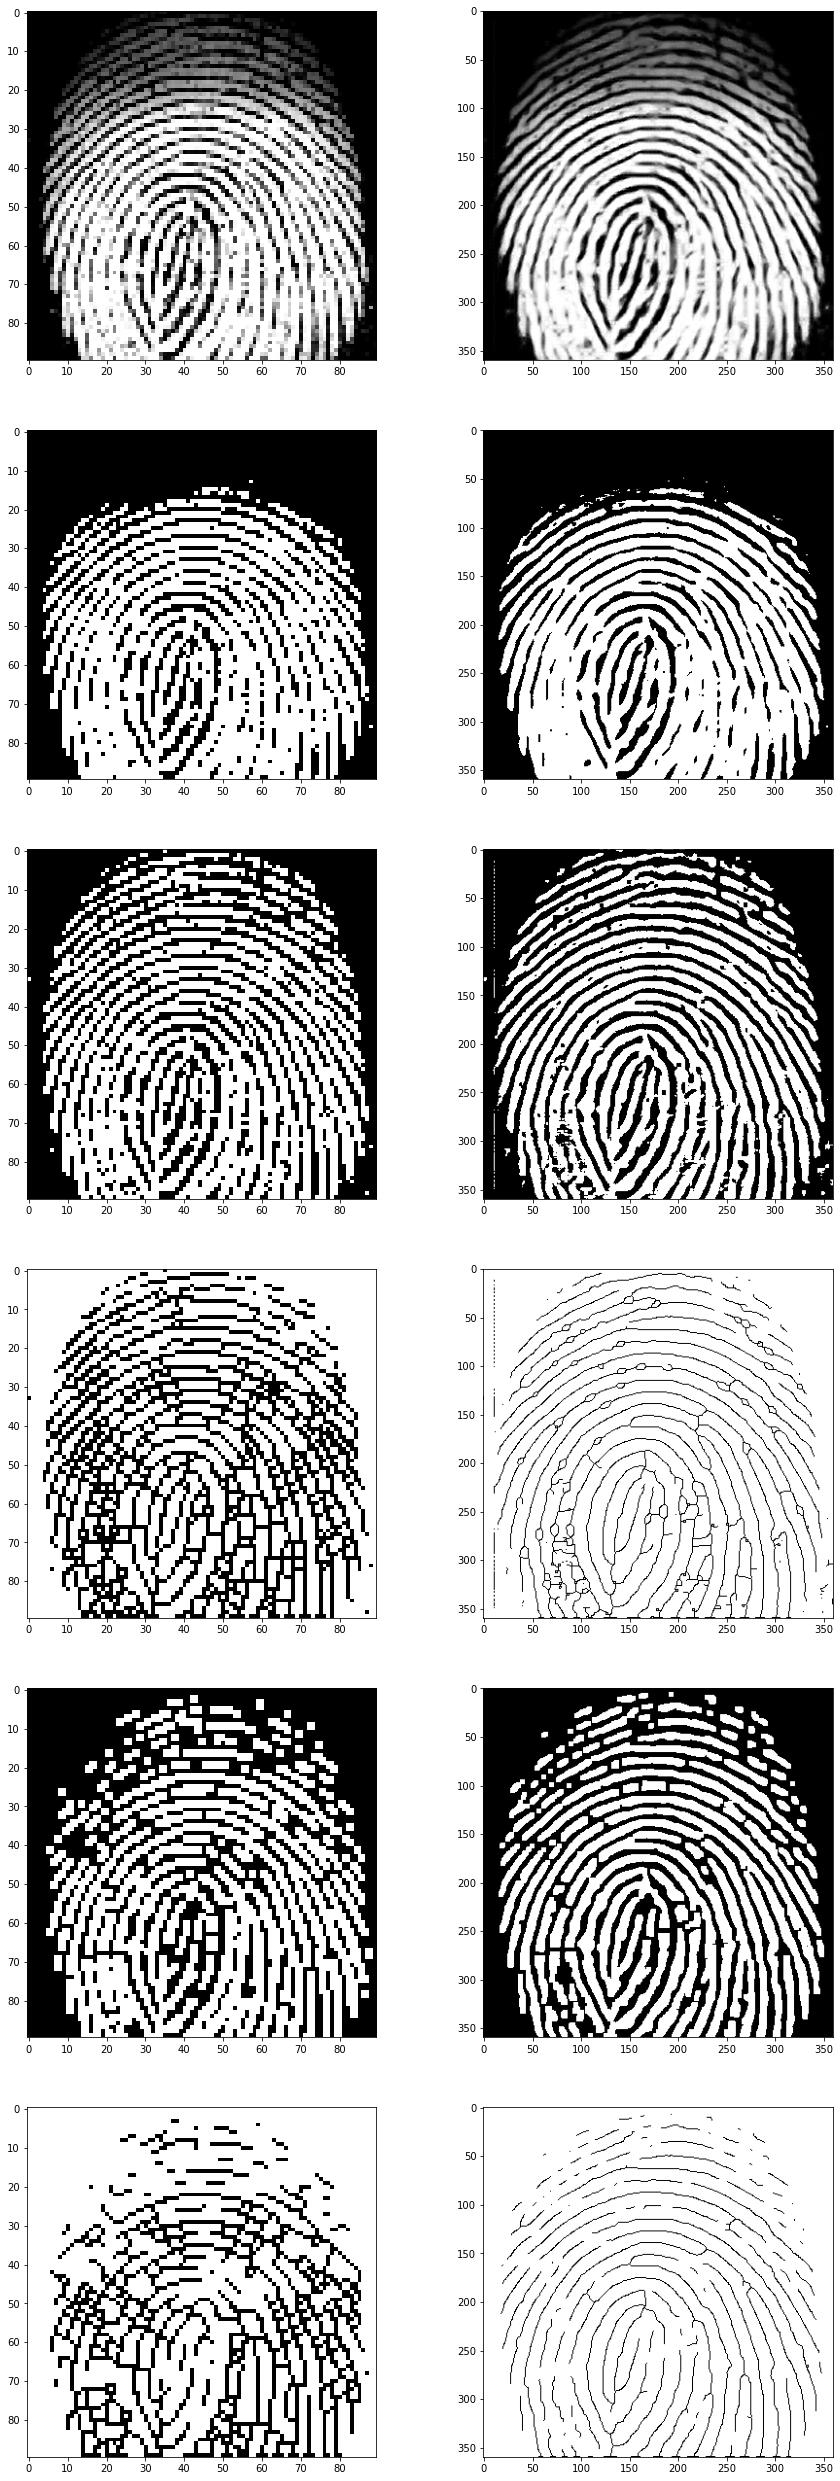

In [31]:
import numpy as np
import matplotlib.pyplot as plt
# https://python.tutorialink.com/module-cv2-cv2-has-no-attribute-dnn_superres/
# pip3 install opencv-contrib-python
import cv2
from cv2 import dnn_superres

# Create an SR object
sr = dnn_superres.DnnSuperResImpl_create()

# Read the desired model
path = "..\\..\\..\\modele\\"
file = "FSRCNN_x4.pb"
sr.readModel(path+file)

# Set the desired model and scale to get correct pre- and post-processing
sr.setModel("fsrcnn", 4)

# Read image
image_path = "C:\\Users\\olaka\\OneDrive\\Dokumenty\\DATABASES\\SOCOFing\\Real\\1__M_Left_index_finger.BMP"
image = cv2.imread(image_path, 0)[8:98, 2:92]

# Upscale the image
result = sr.upsample(image)


fig, axs = plt.subplots(6, 2, figsize=(15,45))

axs[0][0].imshow(image, cmap='binary')
axs[0][1].imshow(result, cmap='binary')

image_otsu = cv2.threshold(image, 128, 255, cv2.THRESH_OTSU)[1]
result_otsu = cv2.threshold(result, 128, 255, cv2.THRESH_OTSU)[1]

axs[1][0].imshow(image_otsu, cmap='binary')
axs[1][1].imshow(result_otsu, cmap='binary')

image_at = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 5)
result_at = cv2.adaptiveThreshold(result, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 25, 5)

axs[2][0].imshow(image_at, cmap='binary')
axs[2][1].imshow(result_at, cmap='binary')

image_at_t = cv2.ximgproc.thinning(~image_at)
result_at_t = cv2.ximgproc.thinning(~result_at)

axs[3][0].imshow(image_at_t, cmap='binary')
axs[3][1].imshow(result_at_t, cmap='binary')

kernel2 = np.ones((2,2),np.uint8)
kernel = np.ones((5,5),np.uint8)
image_closing = cv2.morphologyEx(image_at, cv2.MORPH_CLOSE, kernel2)
result_closing = cv2.morphologyEx(result_at, cv2.MORPH_CLOSE, kernel)

axs[4][0].imshow(image_closing, cmap='binary')
axs[4][1].imshow(result_closing, cmap='binary')

image_closing_t = cv2.ximgproc.thinning(~image_closing)
result_closing_t = cv2.ximgproc.thinning(~result_closing)

axs[5][0].imshow(image_closing_t, cmap='binary')
axs[5][1].imshow(result_closing_t, cmap='binary')
